In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"  # Update with your file path
df = pd.read_csv(file_path)

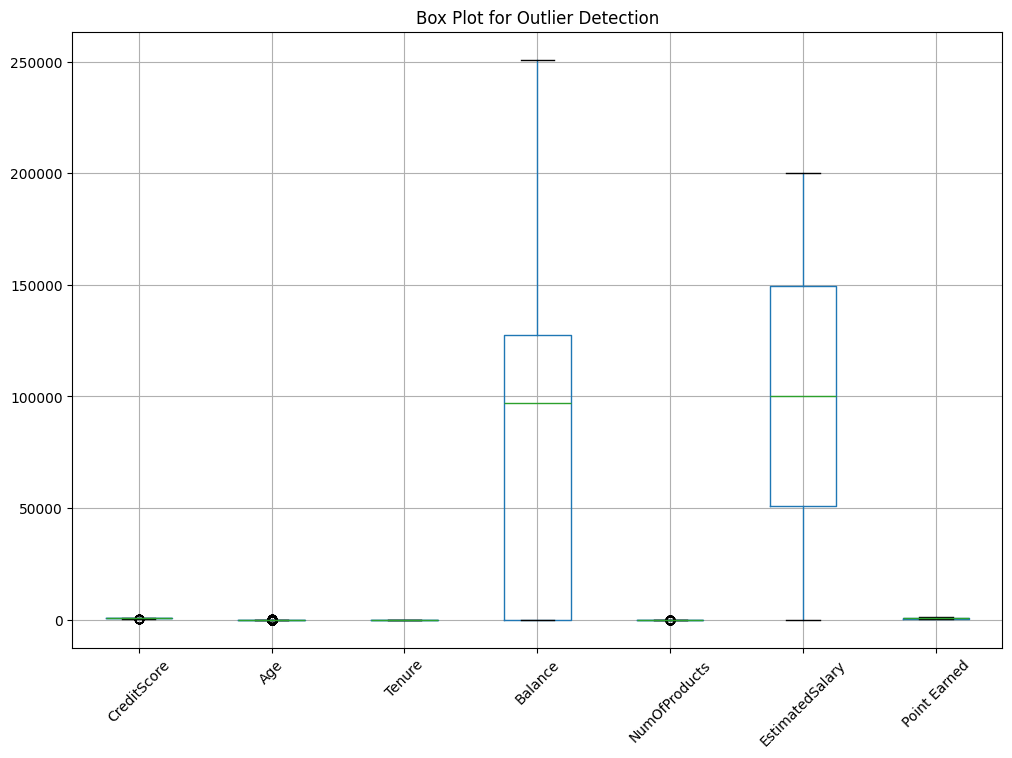

In [3]:
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Box Plot for Outlier Detection")
plt.show()

In [5]:
def remove_outliers(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [6]:
df_clean = remove_outliers(df, numerical_cols)
print(f"Original size: {df.shape}, Cleaned size: {df_clean.shape}")

Original size: (10000, 18), Cleaned size: (9568, 18)


In [9]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Geography"] = le.fit_transform(df["Geography"])

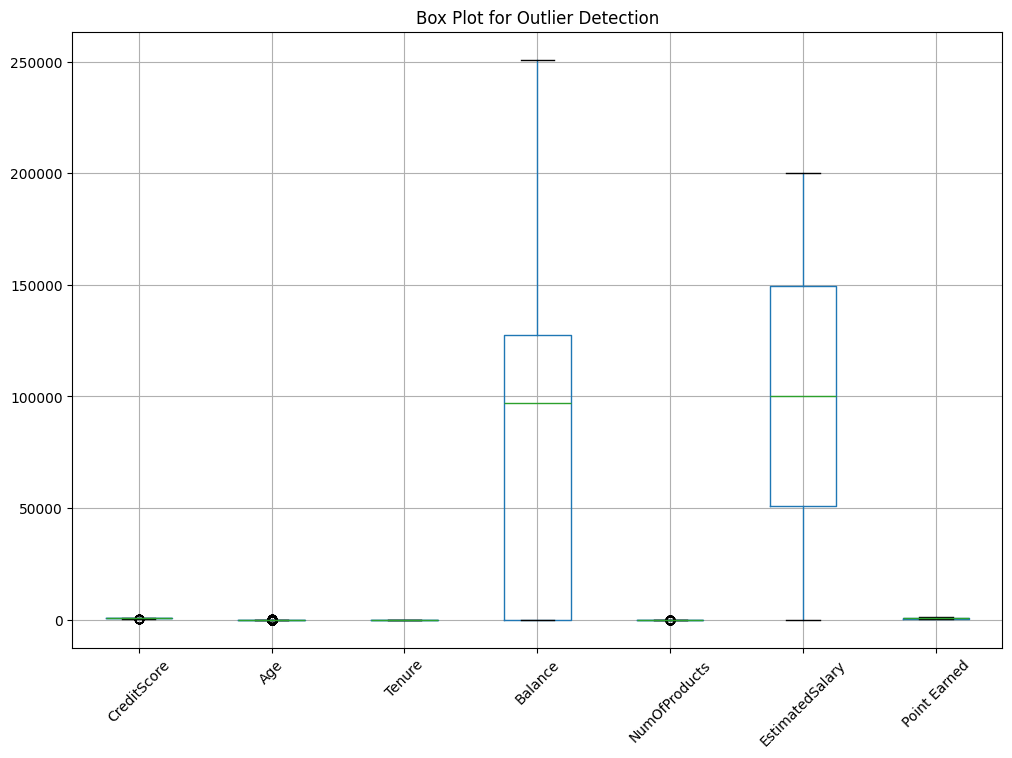

In [10]:
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Box Plot for Outlier Detection")
plt.show()


In [11]:
def remove_outliers(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [12]:
df_clean = remove_outliers(df, numerical_cols)
print(f"Original size: {df.shape}, Cleaned size: {df_clean.shape}")

Original size: (10000, 18), Cleaned size: (9568, 18)


In [13]:
features = numerical_cols + ["HasCrCard", "IsActiveMember", "Complain", "Gender", "Geography"]
target = "Exited"

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(df_clean[features], df_clean[target], test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

In [16]:
svm = SVC()
rf = RandomForestClassifier()
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
svm.fit(X_train_clean, y_train_clean)
rf.fit(X_train_clean, y_train_clean)
y_pred_svm_clean = svm.predict(X_test_clean)
y_pred_rf_clean = rf.predict(X_test_clean)

In [17]:
accuracy_results = {
    "SVM (Original)": accuracy_score(y_test, y_pred_svm),
    "RF (Original)": accuracy_score(y_test, y_pred_rf),
    "SVM (Cleaned)": accuracy_score(y_test_clean, y_pred_svm_clean),
    "RF (Cleaned)": accuracy_score(y_test_clean, y_pred_rf_clean),
}
print("Model Performance Comparison:")
print(accuracy_results)

Model Performance Comparison:
{'SVM (Original)': 0.999, 'RF (Original)': 0.999, 'SVM (Cleaned)': 0.9989550679205852, 'RF (Cleaned)': 0.9989550679205852}
